In [119]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [120]:

dataset = pd.read_csv(r"C:\Users\dell\Desktop\Rohith\loan_approval_dataset.csv")

In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [122]:
print(dataset.isna().sum())
print(dataset.duplicated().sum())
print(dataset.duplicated())
print(dataset.drop_duplicates(inplace=True))

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64
0
0       False
1       False
2       False
3       False
4       False
        ...  
4264    False
4265    False
4266    False
4267    False
4268    False
Length: 4269, dtype: bool
None


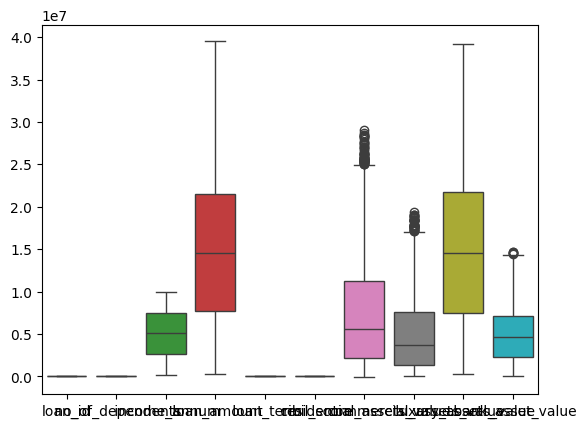

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=dataset)
plt.show()

                            loan_id   no_of_dependents   income_annum  \
loan_id                    1.000000           0.005326       0.012592   
 no_of_dependents          0.005326           1.000000       0.007266   
 income_annum              0.012592           0.007266       1.000000   
 loan_amount               0.008170          -0.003366       0.927470   
 loan_term                 0.009809          -0.020111       0.011488   
 cibil_score               0.016323          -0.009998      -0.023034   
 residential_assets_value  0.020936           0.007376       0.636841   
 commercial_assets_value   0.018595          -0.001531       0.640328   
 luxury_assets_value      -0.000862           0.002817       0.929145   
 bank_asset_value          0.010765           0.011163       0.851093   

                            loan_amount   loan_term   cibil_score  \
loan_id                        0.008170    0.009809      0.016323   
 no_of_dependents             -0.003366   -0.020111     -0

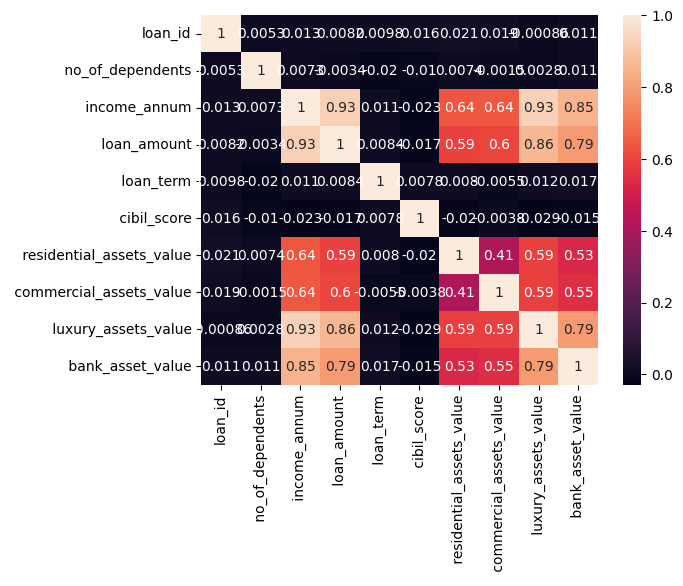

In [124]:
correlation=dataset.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True)
plt.show()

In [125]:
print(dataset.describe)

<bound method NDFrame.describe of       loan_id   no_of_dependents      education  self_employed   income_annum  \
0           1                  2       Graduate             No        9600000   
1           2                  0   Not Graduate            Yes        4100000   
2           3                  3       Graduate             No        9100000   
3           4                  3       Graduate             No        8200000   
4           5                  5   Not Graduate            Yes        9800000   
...       ...                ...            ...            ...            ...   
4264     4265                  5       Graduate            Yes        1000000   
4265     4266                  0   Not Graduate            Yes        3300000   
4266     4267                  2   Not Graduate             No        6500000   
4267     4268                  1   Not Graduate             No        4100000   
4268     4269                  1       Graduate             No        92000

In [126]:
print(dataset.std(numeric_only=True))

loan_id                      1.232498e+03
 no_of_dependents            1.695910e+00
 income_annum                2.806840e+06
 loan_amount                 9.043363e+06
 loan_term                   5.709187e+00
 cibil_score                 1.724304e+02
 residential_assets_value    6.503637e+06
 commercial_assets_value     4.388966e+06
 luxury_assets_value         9.103754e+06
 bank_asset_value            3.250185e+06
dtype: float64


In [127]:

dataset.columns = dataset.columns.str.strip()

In [128]:

# dataset_cleaned = dataset.drop(columns=["loan_id"])

In [129]:
label_encoders = {}
categorical_cols = ["education","self_employed","loan_status"]

In [130]:
for col in categorical_cols:
    le = LabelEncoder()
    dataset_cleaned[col] = le.fit_transform(dataset_cleaned[col])
    label_encoders[col] = le

In [131]:
# X = dataset_cleaned.drop(columns=["loan_status"])
# y = dataset_cleaned["loan_status"]

In [132]:
x=dataset.iloc[:,:12]
print(x)
y=dataset["loan_status"]

      loan_id  no_of_dependents      education self_employed  income_annum  \
0           1                 2       Graduate            No       9600000   
1           2                 0   Not Graduate           Yes       4100000   
2           3                 3       Graduate            No       9100000   
3           4                 3       Graduate            No       8200000   
4           5                 5   Not Graduate           Yes       9800000   
...       ...               ...            ...           ...           ...   
4264     4265                 5       Graduate           Yes       1000000   
4265     4266                 0   Not Graduate           Yes       3300000   
4266     4267                 2   Not Graduate            No       6500000   
4267     4268                 1   Not Graduate            No       4100000   
4268     4269                 1       Graduate            No       9200000   

      loan_amount  loan_term  cibil_score  residential_assets_v

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [134]:
scaler = StandardScaler()   
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [135]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [136]:
y_pred = rf_model.predict(X_test)

In [137]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9797033567525371

Classification Report:
               precision    recall  f1-score   support

    Approved       0.98      0.99      0.98       810
    Rejected       0.98      0.96      0.97       471

    accuracy                           0.98      1281
   macro avg       0.98      0.98      0.98      1281
weighted avg       0.98      0.98      0.98      1281


Confusion Matrix:
 [[802   8]
 [ 18 453]]


In [138]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
